# Analysis and Visualization of Complex Agro-Environmental Data
## Exercise 2 - Best Charts to Represent Different Data Types
### Author: Luís Pinto Coelho

This notebook contains an analysis of different types of datasets and their best visualization methods.
We will:

1. Identify the types of variables and tables created using randomization.
2. Interpret the provided code to explain its function.
3. Choose the most suitable type of plot for each dataset, justifying our choices.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set_theme(style="whitegrid")

## Step 1: Identifying Variables & Tables

We will generate different types of data using randomization:
- **Categorical Data**: Land use types stored in `var1`
- **Numerical Continuous Data**: Cover values stored in `var2`
- **Time Series Data**: Temperature over time stored in `table3`
- **Correlated Data**: Temperature & Precipitation stored in `table4`
- **Multi-category Time Data**: Land use changes over time stored in `table5`


In [3]:
# Simulating categorical data (Land Use Types)
random.seed(24)
levels = ["Permanent crops", "Irrigated crops", "Managed Forest", "Natural Forest", 
          "Agro-Forestry system", "Urban", "Pasture", "Shrubland"]

var1 = [random.choice(levels) for _ in range(100)]

# Simulating numerical data (Cover values)
np.random.seed(24)
var2 = np.random.uniform(0, 100, 100)

# Creating Data Tables
table1 = pd.DataFrame(var1, columns=["landuse"]).value_counts().reset_index()
table1.columns = ["landuse", "Frequency"]

table2 = pd.DataFrame({"landuse": var1, "cover": var2})

years = list(range(1970, 2021))
temperatures = np.random.normal(17, 2, len(years))
table3 = pd.DataFrame({"Year": years, "Temperature": temperatures})

np.random.seed(24)
mean_temp, mean_precip = [18.5, 750]
std_temp, std_precip = [2, 300]
corr_matrix = [[std_temp**2, std_temp * std_precip * -0.7], 
               [std_temp * std_precip * -0.7, std_precip**2]]

table4 = pd.DataFrame(np.random.multivariate_normal([mean_temp, mean_precip], corr_matrix, 100),
                      columns=["Mean Annual Temperature", "Total Precipitation"])

years_repeat = np.tile(list(range(1900, 2010, 10)), 8)
landuse_types = levels * 11
cover_values = np.random.uniform(0, 100, len(years_repeat))
table5 = pd.DataFrame({"Year": years_repeat, "Landuse": landuse_types, "Cover": cover_values})


## Step 3: Choosing the Best Visualizations

Below, we will visualize the datasets using appropriate charts:

- **Bar Chart** → To show the frequency of land use types.
- **Boxplot** → To show the distribution of cover values for each land use type.
- **Line Chart** → To show temperature trends over time.
- **Scatter Plot** → To explore the relationship between temperature and precipitation.
- **Stacked Area Chart** → To visualize land use changes over time.

Each plot will be justified below.


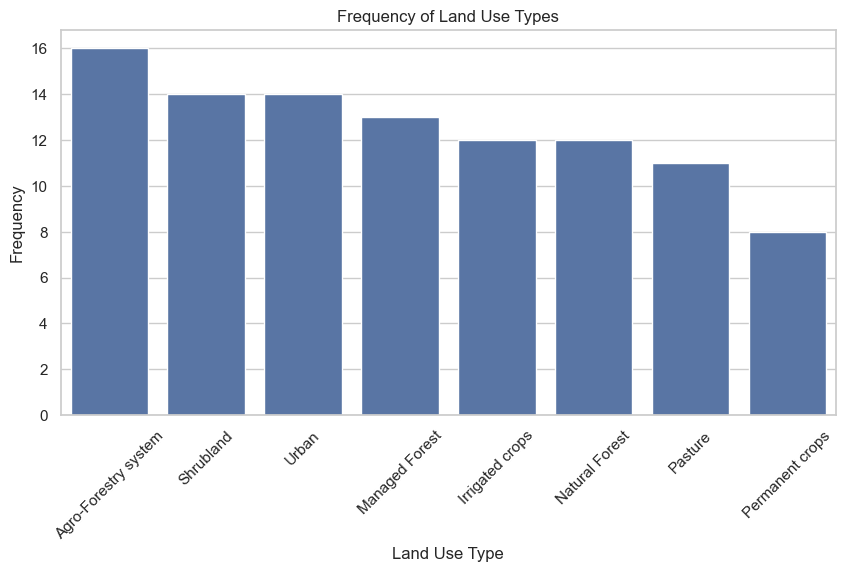

In [4]:
# Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x="landuse", y="Frequency", data=table1)
plt.xticks(rotation=45)
plt.xlabel("Land Use Type")
plt.ylabel("Frequency")
plt.title("Frequency of Land Use Types")
plt.show()


### Bar Chart - Frequency of Land Use Types
🔹 A bar chart is the best choice because:
- It compares categorical data (land use types).
- Makes it easy to see which land uses are more frequent.
- **X-axis**: Land use type | **Y-axis**: Frequency


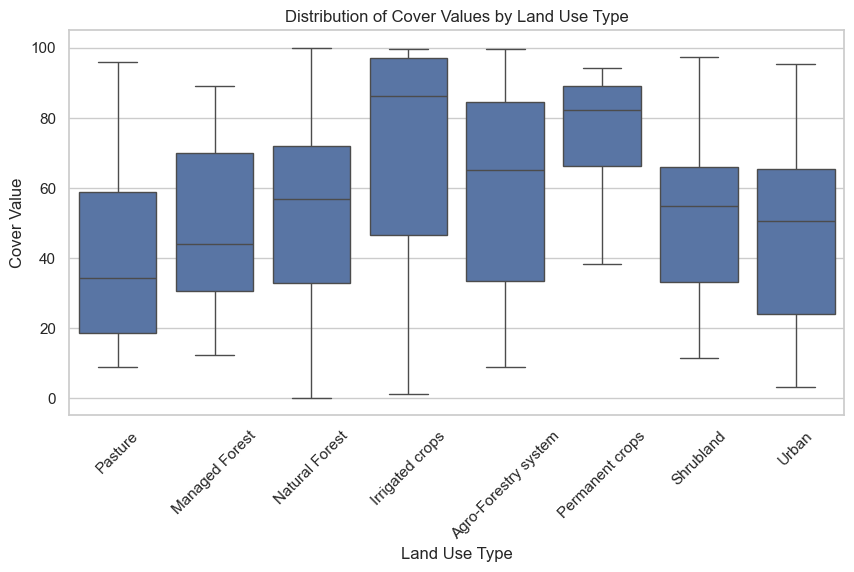

In [5]:
# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x="landuse", y="cover", data=table2)
plt.xticks(rotation=45)
plt.xlabel("Land Use Type")
plt.ylabel("Cover Value")
plt.title("Distribution of Cover Values by Land Use Type")
plt.show()


### Boxplot - Cover Values for Each Land Use Type
🔹 A boxplot is the best choice because:
- It shows the spread of cover values for each land use type.
- Helps identify outliers and compare distributions.
- **X-axis**: Land use type | **Y-axis**: Cover value


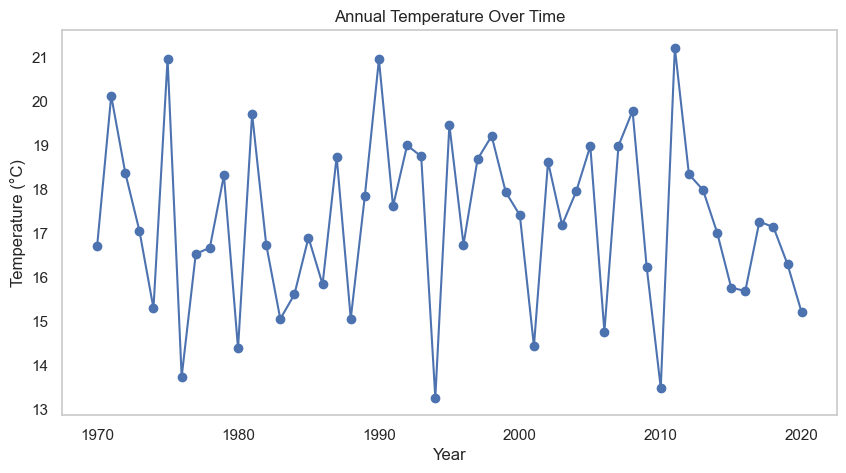

In [6]:
# Line Chart
plt.figure(figsize=(10, 5))
plt.plot(table3["Year"], table3["Temperature"], marker="o", linestyle="-", color="b")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Annual Temperature Over Time")
plt.grid()
plt.show()


### Line Chart - Temperature Trends Over Time
🔹 A line chart is the best choice because:
- It shows trends over time (years vs. temperature).
- Helps analyze patterns, fluctuations, and long-term changes.
- **X-axis**: Year | **Y-axis**: Temperature (°C)


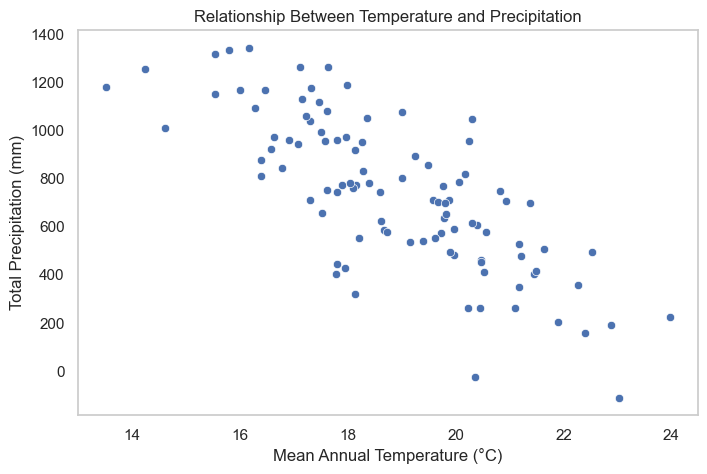

In [7]:
# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Mean Annual Temperature", y="Total Precipitation", data=table4)
plt.xlabel("Mean Annual Temperature (°C)")
plt.ylabel("Total Precipitation (mm)")
plt.title("Relationship Between Temperature and Precipitation")
plt.grid()
plt.show()


### Scatter Plot - Relationship Between Temperature and Precipitation
🔹 A scatter plot is the best choice because:
- It visualizes the relationship between two numerical variables.
- Helps identify correlations or patterns.
- **X-axis**: Temperature | **Y-axis**: Precipitation


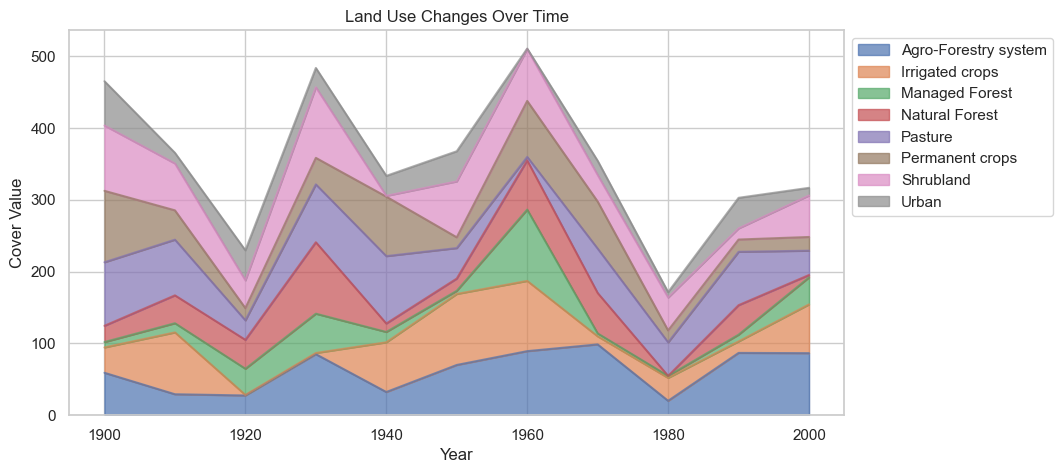

In [8]:
# Stacked Area Chart
pivot_table5 = table5.pivot(index="Year", columns="Landuse", values="Cover")
pivot_table5.plot(kind="area", stacked=True, figsize=(10, 5), alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Cover Value")
plt.title("Land Use Changes Over Time")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


### Stacked Area Chart - Land Use Changes Over Time
🔹 A stacked area chart is the best choice because:
- It shows how land use types changed over time.
- Makes it easy to compare proportions of land use categories.
- **X-axis**: Year | **Y-axis**: Cover value
